<a href="https://colab.research.google.com/github/trantoan62/AI-CNN-TranQuocToan/blob/main/Vietnamese_foods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers.pooling import MaxPooling2D
from keras.backend import conv2d
from keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.layers.core.flatten import Flatten
from tensorflow.keras.optimizers import SGD
from keras.models import load_model
import plotly.graph_objects as go
from keras.preprocessing.image import load_img, img_to_array

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = '/content/drive/MyDrive/Vietnamese_foods/train'
test_path = '/content/drive/MyDrive/Vietnamese_foods/test'

In [ ]:
X_train = ImageDataGenerator(rescale=1/255)
X_test = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = X_train.flow_from_directory(
    directory=r"/content/drive/MyDrive/Vietnamese_foods/train",
    target_size=(200, 200),
    batch_size=3,
    class_mode="categorical",
    )
test_dataset = X_test.flow_from_directory(
    directory=r"/content/drive/MyDrive/Vietnamese_foods/test",
    target_size=(200, 200),
    batch_size=3,
    class_mode= "categorical",
    )

Found 433 images belonging to 10 classes.
Found 146 images belonging to 10 classes.


In [ ]:
train_dataset.classes
train_dataset.class_indices

{'banhcuon': 0,
 'banhkhot': 1,
 'banhmi': 2,
 'banhuot': 3,
 'banhxeo': 4,
 'bunbo': 5,
 'buncha': 6,
 'bundau': 7,
 'charam': 8,
 'phobo': 9}

In [ ]:
model = Sequential([
    Conv2D(16,3, padding='same', activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D(),
    Conv2D(32,3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64,3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128,3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128,3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 64)       0

In [ ]:
model.compile(loss = ['categorical_crossentropy'], 
              optimizer = 'Adam', 
              metrics = ['accuracy'])

In [ ]:
history=model.fit(train_dataset, epochs=50, batch_size=32, verbose=1, validation_data= test_dataset)

Epoch 1/50
145/145 [==============================] - 165s 1s/step - loss: 2.3065 - accuracy: 0.0716 - val_loss: 2.3018 - val_accuracy: 0.1096
Epoch 2/50
145/145 [==============================] - 3s 19ms/step - loss: 2.3089 - accuracy: 0.1039 - val_loss: 2.2931 - val_accuracy: 0.0411
Epoch 3/50
145/145 [==============================] - 3s 19ms/step - loss: 2.2987 - accuracy: 0.1201 - val_loss: 2.3396 - val_accuracy: 0.1096
Epoch 4/50
145/145 [==============================] - 3s 19ms/step - loss: 2.3133 - accuracy: 0.1155 - val_loss: 2.3000 - val_accuracy: 0.1096
Epoch 5/50
145/145 [==============================] - 3s 19ms/step - loss: 2.3017 - accuracy: 0.0993 - val_loss: 2.3025 - val_accuracy: 0.1096
Epoch 6/50
145/145 [==============================] - 3s 22ms/step - loss: 2.3028 - accuracy: 0.1247 - val_loss: 2.2605 - val_accuracy: 0.1164
Epoch 7/50
145/145 [==============================] - 3s 19ms/step - loss: 2.2726 - accuracy: 0.1409 - val_loss: 2.5220 - val_accuracy: 0.1096

In [ ]:
model.save('Vietnamese_foods.h5')

In [ ]:
labels = {0: 'banh cuon',
1: 'banh khot',
2: 'banh mi',
3: 'banh uot',
4: 'banh xeo',
5: 'bun bo',
6: 'bun cha',
7: 'bun dau',
8: 'cha ram',
9: 'pho bo'}

This is:  cha ram


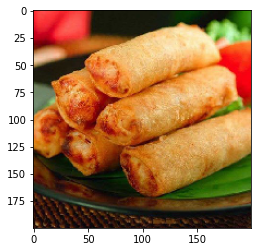

In [ ]:
img = load_img('/content/charam.jpg', target_size =(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
img.shape
val = model.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])

This is:  bun bo


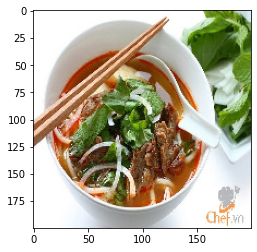

In [ ]:
img = load_img('/content/bunbo.jpg', target_size =(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
img.shape
val = model.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])

This is:  banh xeo


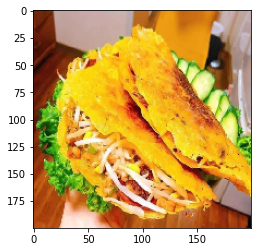

In [ ]:
img = load_img('/content/banhxeo.jpg', target_size =(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
img.shape
val = model.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])